In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras import models, layers, activations
from keras.layers import Conv2D, TimeDistributed, BatchNormalization, MaxPooling2D, Flatten, Bidirectional, Dense,Dropout,Flatten

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
x_data = np.load('/content/gdrive/My Drive/jolp/lip/lip_x_data.npy') # x_save.npy
y_data = np.load('/content/gdrive/My Drive/jolp/lip/lip_y_data.npy') # y_data.npy



y_data = keras.utils.to_categorical(y_data, num_classes=None)
#X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle = True, stratify=y_data)
print(x_data.shape, y_data.shape)

(3000, 27, 64, 64, 3) (3000, 11)


In [4]:
# Train과 Test 분리
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle = True, stratify=y_data)\
#X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle = False)
print("x_train: {}, X_test: {}".format(X_train.shape, X_test.shape))
print("Y_train: {}, Y_test: {}".format(Y_train.shape, Y_test.shape))

x_train: (2400, 27, 64, 64, 3), X_test: (600, 27, 64, 64, 3)
Y_train: (2400, 11), Y_test: (600, 11)


In [5]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Input


# this could also be the output a different Keras model or layer
#input_tensor = Input(shape=(224, 224, 3))

#model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=True)

class MobileNet_LSTM(keras.Model):
    def __init__(self, num_classes):
        super(MobileNet_LSTM, self).__init__()
        #self.BZ = input_shape[0]
        #self.frame = input_shape[1]

        self.mobile = TimeDistributed(MobileNet(weights='imagenet', include_top=False))
        #self.vgg.trainable = False

        self.bilstm = layers.Bidirectional(layers.LSTM(256), merge_mode='concat')
        self.dense = layers.Dense(num_classes, activation='softmax')
        self.max = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))
        self.dropout = layers.Dropout(0.2)
        self.flat= TimeDistributed(Flatten())

    def call(self, x):
        x = self.mobile(x)
        x = self.max(x)
        x = self.dropout(x)      
        x = self.flat(x)
        x = self.dropout(x)
        x = self.bilstm(x)
        return self.dense(x)

In [6]:
def get_model():
    return MobileNet_LSTM(num_classes =11)

In [7]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [8]:

model = get_model()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

17227776/17225924 [==============================] - 0s 0us/step


In [9]:
es = EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(X_train, Y_train, batch_size= 32, epochs= 100, verbose = 1, validation_split = 0.2, callbacks=[es])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/100
60/60 [==============================] - 30s 214ms/step - loss: 2.4642 - accuracy: 0.1168 - val_loss: 2.3288 - val_accuracy: 0.1021
Epoch 2/100
60/60 [==============================] - 12s 197ms/step - loss: 2.3130 - accuracy: 0.1168 - val_loss: 2.3379 - val_accuracy: 0.1083
Epoch 3/100
60/60 [==============================] - 12s 196ms/step - loss: 2.2543 - accuracy: 0.1634 - val_loss: 2.2339 - val_accuracy: 0.1625
Epoch 4/100
60/60 [==============================] - 12s 194ms/step - loss: 2.1246 - accuracy: 0.2044 - val_loss: 2.2520 - val_accuracy: 0.1688
Epoch 5/100
60/60 [==============================] - 12s 196ms/step - loss: 2.0361 - accuracy: 0.2298 - val_loss: 2.0203 - val_accuracy: 0.2104
Epoch 6/100
60/60 [==============================] - 12s 194ms/step - loss: 1.9413 - accuracy: 0.2533 - val_loss: 2.0662 - val_accuracy: 0.1792
Epoch 7/100
60/60 [==============================] - 12s 198ms/step - loss: 1.8473 - accuracy: 0.3209 - val_loss: 1.9059 - val_accuracy:

In [12]:
history.history

{'accuracy': [0.1119791641831398,
  0.1119791641831398,
  0.16354165971279144,
  0.21041665971279144,
  0.2265625,
  0.2760416567325592,
  0.33125001192092896,
  0.3515625,
  0.42395833134651184,
  0.47968751192092896,
  0.512499988079071,
  0.5067708492279053,
  0.5651041865348816,
  0.6468750238418579,
  0.6859375238418579,
  0.734375,
  0.7869791388511658,
  0.8098958134651184,
  0.8505208492279053,
  0.8901041746139526,
  0.926562488079071,
  0.9583333134651184,
  0.9614583253860474,
  0.9546874761581421,
  0.9682291746139526,
  0.9760416746139526,
  0.9739583134651184,
  0.9859374761581421,
  0.9645833373069763,
  0.9598958492279053,
  0.9677083492279053,
  0.981249988079071,
  0.96875,
  0.9864583611488342,
  0.9895833134651184,
  0.9828125238418579,
  0.9864583611488342,
  0.9880208373069763,
  0.987500011920929,
  0.979687511920929,
  0.9807291626930237,
  0.9677083492279053,
  0.9630208611488342,
  0.9458333253860474,
  0.9703124761581421],
 'loss': [2.407205104827881,
  2.313

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


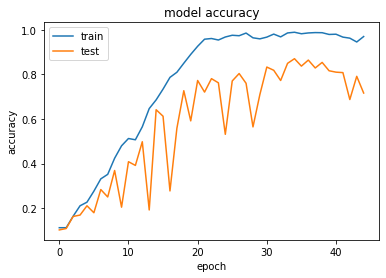

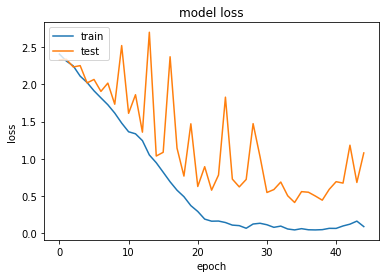

In [13]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()